In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
train_df = pd.read_csv('../WDBC_Train.csv')
valid_df = pd.read_csv('../WDBC_Validation.csv')
test_df = pd.read_csv('../WDBC_Test.csv')

train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0,11.360,17.57,72.49,399.8,0.08858,0.05313,0.02783,0.021000,0.1601,...,13.05,36.32,85.07,521.3,0.1453,0.16220,0.1811,0.08698,0.2973,0.07745
1,1,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.156200,0.2162,...,26.23,28.74,172.00,2081.0,0.1502,0.57170,0.7053,0.24220,0.3828,0.10070
2,0,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.034830,0.1822,...,14.77,20.50,97.67,677.3,0.1478,0.22560,0.3009,0.09722,0.3849,0.08633
3,0,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,...,10.93,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920
4,1,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.4107,0.22160,0.2060,0.07115


In [7]:
X_train, y_train = train_df.iloc[:, 1:], train_df.iloc[:, 0]
X_valid, y_valid = valid_df.iloc[:, 1:], valid_df.iloc[:, 0]
X_test, y_test = test_df.iloc[:, 1:], test_df.iloc[:, 0]

print('Train shape: ', X_train.shape)
print('Validation shape: ', X_valid.shape)
print('Test shape: ', X_test.shape)

Train shape:  (341, 30)
Validation shape:  (114, 30)
Test shape:  (114, 30)


### Logistic Regression

In [8]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train,y_train)

y_valid_pred = logistic_reg.predict(X_valid)
y_test_pred = logistic_reg.predict(X_test)

print("Successfully Executed!!!")

Successfully Executed!!!


C:\Users\Teja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'w-parameter value')

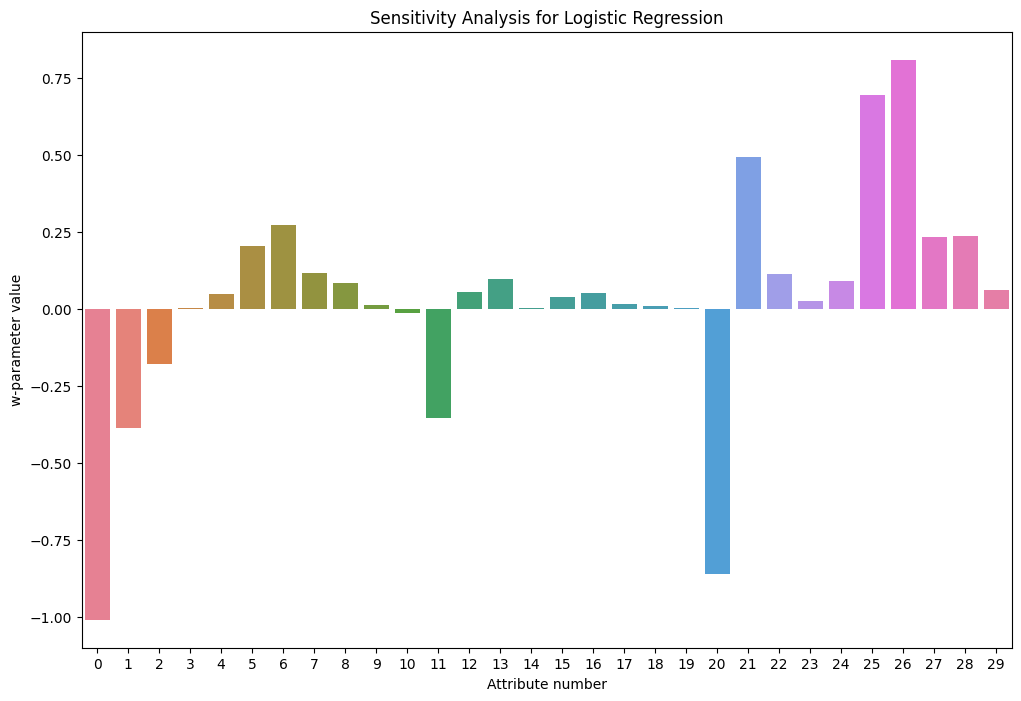

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(logistic_reg.coef_)
plt.title("Sensitivity Analysis for Logistic Regression")
plt.xlabel("Attribute number")
plt.ylabel("w-parameter value")

### Evaluation Metrics

In [42]:
print("---------Validation-----------")

cm = confusion_matrix(y_valid, y_valid_pred)
acc = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)

print(f"Logistic Regression Accuracy on Validation: {acc:.4f}")
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")


print("---------Test-----------")


cm1 = confusion_matrix(y_test_pred, y_test)
acc1 = accuracy_score(y_test_pred, y_test)
precision1 = precision_score(y_test_pred, y_test)
recall1 = recall_score(y_test_pred, y_test)
f11 = f1_score(y_test_pred, y_test)

print(f"Logistic Regression Accuracy on Test: {acc1:.4f}")
print("Confusion Matrix:")
print(cm1)
print(f"Precision: {precision1:.4f}, Recall: {recall1:.4f}, F1-score: {f11:.4f}\n")

---------Validation-----------
Logistic Regression Accuracy on Validation: 0.9561
Confusion Matrix:
[[70  1]
 [ 4 39]]
Precision: 0.9750, Recall: 0.9070, F1-score: 0.9398

---------Test-----------
Logistic Regression Accuracy on Test: 0.9474
Confusion Matrix:
[[69  3]
 [ 3 39]]
Precision: 0.9286, Recall: 0.9286, F1-score: 0.9286

